<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Lab 2: Data wrangling


Estimated time needed: **60** minutes


In this lab, we will perform some Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models.

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship.

In this lab we will mainly convert those outcomes into Training Labels with `1` means the booster successfully landed `0` means it was unsuccessful.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


## Objectives

Perform exploratory  Data Analysis and determine Training Labels

*   Exploratory Data Analysis
*   Determine Training Labels


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries.


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

### Data Analysis


Load Space X dataset, from last section.


In [129]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute


<AxesSubplot:xlabel='FlightNumber', ylabel='LaunchSite'>

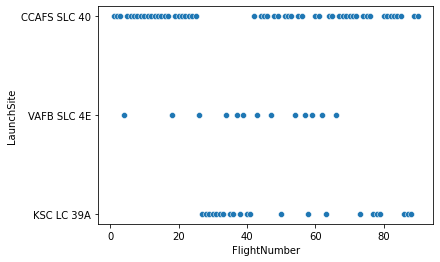

In [3]:
import seaborn as sns
sns.scatterplot(data=df, x="FlightNumber", y="LaunchSite")

Identify which columns are numerical and categorical:


<AxesSubplot:xlabel='PayloadMass', ylabel='LaunchSite'>

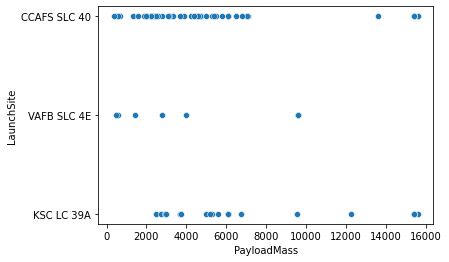

In [4]:
sns.scatterplot(data=df, x="PayloadMass", y="LaunchSite")

In [8]:
landing_outcomes=df.value_counts("Outcome")
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

### TASK 4: Create a landing outcome label from Outcome column


Using the <code>Outcome</code>,  create a list where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>:


In [9]:
df["landing_class"]= df["Outcome"].isin(['False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'])
df['landing_class'] = df.landing_class.astype(int)
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
landing_class       int32
dtype: object

In [10]:
df.value_counts("landing_class")

landing_class
0    60
1    30
dtype: int64

In [11]:
df['Class'] = np.where(df['landing_class']==0, 1, 0)
df.value_counts("Class")

Class
1    60
0    30
dtype: int64

This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the  first stage did not land successfully; one means  the first stage landed Successfully


In [12]:
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [13]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,1,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,1,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,1,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,1,0


In [16]:
df.value_counts("LaunchSite")

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
dtype: int64

In [133]:
sqldf("SELECT LaunchSite FROM df group by LaunchSite;", locals())

,LaunchSite
0,CCAFS SLC 40
1,KSC LC 39A
2,VAFB SLC 4E


We can use the following line of code to determine  the success rate:


In [17]:
df["Class"].mean()

0.6666666666666666

<AxesSubplot:xlabel='Class', ylabel='Orbit'>

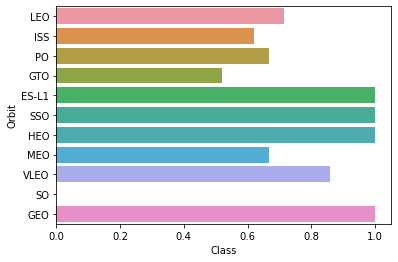

In [17]:
sns.barplot(x="Class", y="Orbit", data=df,ci=None)

<AxesSubplot:xlabel='FlightNumber', ylabel='Orbit'>

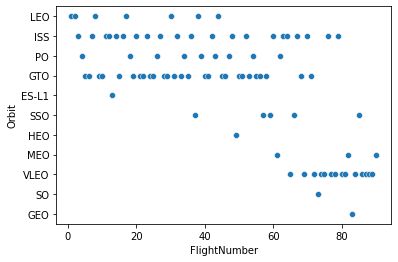

In [19]:
sns.scatterplot(x="FlightNumber", y="Orbit", data=df,ci=None)

<AxesSubplot:xlabel='PayloadMass', ylabel='Orbit'>

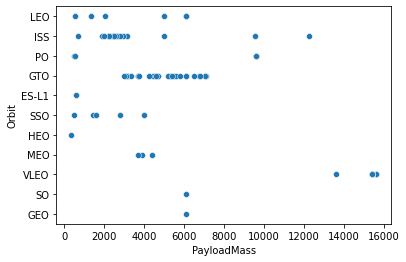

In [20]:
sns.scatterplot(x="PayloadMass", y="Orbit", data=df,ci=None)

In [21]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [24]:
df1=df.groupby(['year'])['Class'].mean().reset_index()

In [25]:
df1.head()

,year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333


<AxesSubplot:xlabel='year', ylabel='Class'>

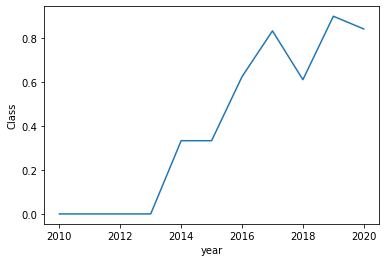

In [26]:
sns.lineplot(data=df1, x="year", y="Class")

In [27]:
df.value_counts("LaunchSite")

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
dtype: int64

In [32]:
#!pip install pandasql
from pandasql import sqldf

In [34]:
sqldf("SELECT * FROM df WHERE LaunchSite like 'CCA%';", locals())

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class,Class,year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B0003,-80.577366,28.561857,1,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B0005,-80.577366,28.561857,1,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B0007,-80.577366,28.561857,1,0,2013
3,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B1004,-80.577366,28.561857,1,0,2013
4,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B1005,-80.577366,28.561857,1,0,2014
5,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,0,0,1,None,1.0,0,B1006,-80.577366,28.561857,0,1,2014
6,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,0,0,1,None,1.0,0,B1007,-80.577366,28.561857,0,1,2014
7,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B1008,-80.577366,28.561857,1,0,2014
8,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B1011,-80.577366,28.561857,1,0,2014
9,11,2014-09-21,Falcon 9,2216.000000,ISS,CCAFS SLC 40,False Ocean,1,0,0,0,None,1.0,0,B1010,-80.577366,28.561857,1,0,2014


In [134]:
df=pd.read_csv("Spacex.csv")

In [135]:
df['Date'] = pd.to_datetime(df['Date'])

In [70]:
#df=pd.to_datetime(df['Date'])

In [136]:
df.head()

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-04-06,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-08-12,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-08-10,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-01-03,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [79]:
df.dtypes

Date                 datetime64[ns]
Time (UTC)                   object
Booster_Version              object
Launch_Site                  object
Payload                      object
PAYLOAD_MASS__KG_             int64
Orbit                        object
Customer                     object
Mission_Outcome              object
Landing_Outcome              object
dtype: object

In [52]:
sqldf("SELECT sum(PAYLOAD_MASS__KG_) FROM df WHERE Customer like '%NASA%';", locals())

,sum(PAYLOAD_MASS__KG_)
0,107010


In [58]:
sqldf("SELECT avg(PAYLOAD_MASS__KG_) FROM df WHERE Booster_Version='F9 v1.1';", locals())

,avg(PAYLOAD_MASS__KG_)
0,2928.4


In [59]:
df.head()

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,04-06-2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,08-12-2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,22-05-2012,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,08-10-2012,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,01-03-2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [86]:
df.value_counts("Mission_Outcome")

Mission_Outcome
Success                             98
Failure (in flight)                  1
Success                              1
Success (payload status unclear)     1
dtype: int64

In [68]:
df.head()

0   2010-04-06
1   2010-08-12
2   2012-05-22
3   2012-08-10
4   2013-01-03
Name: Date, dtype: datetime64[ns]

In [80]:
sqldf("SELECT Date,Landing_Outcome FROM df WHERE Landing_Outcome LIKE '%ground%' ORDER BY Date;", locals())

,Date,Landing_Outcome
0,2015-12-22 00:00:00.000000,Success (ground pad)
1,2016-07-18 00:00:00.000000,Success (ground pad)
2,2017-01-05 00:00:00.000000,Success (ground pad)
3,2017-02-19 00:00:00.000000,Success (ground pad)
4,2017-03-06 00:00:00.000000,Success (ground pad)
5,2017-07-09 00:00:00.000000,Success (ground pad)
6,2017-08-14 00:00:00.000000,Success (ground pad)
7,2017-12-15 00:00:00.000000,Success (ground pad)
8,2018-08-01 00:00:00.000000,Success (ground pad)


In [83]:
sqldf("SELECT Booster_Version,PAYLOAD_MASS__KG_ FROM df WHERE Landing_Outcome = 'Success (drone ship)' AND \
PAYLOAD_MASS__KG_ BETWEEN 4000 AND 6000;", locals())

,Booster_Version,PAYLOAD_MASS__KG_
0,F9 FT B1022,4696
1,F9 FT B1026,4600
2,F9 FT B1021.2,5300
3,F9 FT B1031.2,5200


In [87]:
df.value_counts("Mission_Outcome")

Mission_Outcome
Success                             98
Failure (in flight)                  1
Success                              1
Success (payload status unclear)     1
dtype: int64

In [137]:
sqldf("SELECT Mission_Outcome,count(Mission_Outcome) FROM df \
group by Mission_Outcome;", locals())

,Mission_Outcome,count(Mission_Outcome)
0,Failure (in flight),1
1,Success,98
2,Success,1
3,Success (payload status unclear),1


In [108]:
sqldf("select Booster_Version,PAYLOAD_MASS__KG_ from df where PAYLOAD_MASS__KG_ = \
(SELECT max(PAYLOAD_MASS__KG_) FROM df);", locals())

,Booster_Version,PAYLOAD_MASS__KG_
0,F9 B5 B1048.4,15600
1,F9 B5 B1049.4,15600
2,F9 B5 B1051.3,15600
3,F9 B5 B1056.4,15600
4,F9 B5 B1048.5,15600
5,F9 B5 B1051.4,15600
6,F9 B5 B1049.5,15600
7,F9 B5 B1060.2,15600
8,F9 B5 B1058.3,15600
9,F9 B5 B1051.6,15600


In [111]:
df['Date'] = pd.to_datetime(df['Date'])

In [112]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [113]:
df.head()

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome,year
0,2010-04-06,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute),2010
1,2010-08-12,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),2010
2,2012-05-22,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt,2012
3,2012-08-10,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt,2012
4,2013-01-03,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt,2013


In [114]:
df.value_counts("Landing_Outcome")

Landing_Outcome
Success                   38
No attempt                21
Success (drone ship)      14
Success (ground pad)       9
Controlled (ocean)         5
Failure (drone ship)       5
Failure                    3
Failure (parachute)        2
Uncontrolled (ocean)       2
No attempt                 1
Precluded (drone ship)     1
dtype: int64

In [116]:
sqldf("SELECT Booster_Version,Landing_Outcome,Launch_Site,year FROM df \
WHERE Landing_Outcome = 'Failure (drone ship)'  and year=2015;", locals())

,Booster_Version,Landing_Outcome,Launch_Site,year
0,F9 v1.1 B1012,Failure (drone ship),CCAFS LC-40,2015
1,F9 v1.1 B1015,Failure (drone ship),CCAFS LC-40,2015


In [128]:
sqldf("SELECT Date,count(Landing_Outcome) Total_Outcome FROM df \
where Date between '2010-06-04' and '2017-03-20' group by Landing_Outcome \
order by Date desc;", locals())

,Date,Total_Outcome
0,2016-08-04 00:00:00.000000,5
1,2015-12-22 00:00:00.000000,5
2,2015-10-01 00:00:00.000000,5
3,2015-06-28 00:00:00.000000,1
4,2014-04-18 00:00:00.000000,3
5,2013-09-29 00:00:00.000000,2
6,2012-05-22 00:00:00.000000,10
7,2010-08-12 00:00:00.000000,1


In [ ]:
2010-06-04 and 2017-03-20

We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>df.to_csv("dataset_part\_2.csv", index=False)</code>


In [18]:
df.to_csv("dataset_part_2.csv", index=False)

In [19]:
%pwd

'C:\\Users\\zak\\Downloads'

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-08-31        | 1.1     | Lakshmi Holla | Changed Markdown        |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-04        | 1.1.    | Nayef         | updating the input data |
| 2021-05-026       | 1.1.    | Joseph        | updating the input data |


Copyright © 2021 IBM Corporation. All rights reserved.
